# Comparing regression models

In addition to linear regression, many other regression models are available that are also suitable for modeling non-linear dependencies.

In this notebook two ensemble models are compared. The ensemble model is a combinations of several models.

- **RandomForestRegressor**: Random Forest, especially for avoiding overfitting
- **GradientBoostingRegressor**: an effective method that often gives more accurate predictions than other methods

In [5]:
### Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
### Importing more libraries

### train_test_split can split data into train data and test data

from sklearn.model_selection import train_test_split

### Models used

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Assessing the accuracy of the models

from sklearn.metrics import r2_score

## Function for model fitting and review

If the same code is used repeatedly, the you should make it a function.

In [9]:
### The coefficients of determination (R2) are collected in the following lists.

R2_train = []
R2_test = []

def modeling(model):

    # Fitting the model to train data
    model.fit(X_train, y_train)

    # The coefficient of determination (R2) for train data
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,3))

    # The coefficient of determination (R2) for test data
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,3))

    # Printing the coefficients of determination
    print(f"The coefficient of determination (R2) for train data is {R2_train_model:.3f}")
    print(f"The coefficient of determination (R2) for test data is {R2_test_model:.3f}")

    # Train data error terms as a chart
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Distribution of prediction errors in train data')
    sns.histplot((y_train - y_pred_train), kde = True, ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Realized and predicted as scatter chart for test data
    ax[1].set_title('Realized and predicted in test data')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('realized')
    ax[1].set_ylabel('forecast')

    return(model)

## Data review

In [11]:
### Opening the data in a dataframe

df = pd.read_csv('https://taanila.fi/Advertising.csv')

### View the basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
### Getting acquainted with the data.

df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
### Delete the unnecessary column for the running number

df = df.drop('Unnamed: 0', axis = 1)

### View the result

df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
### Calculation of statistical numbers

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


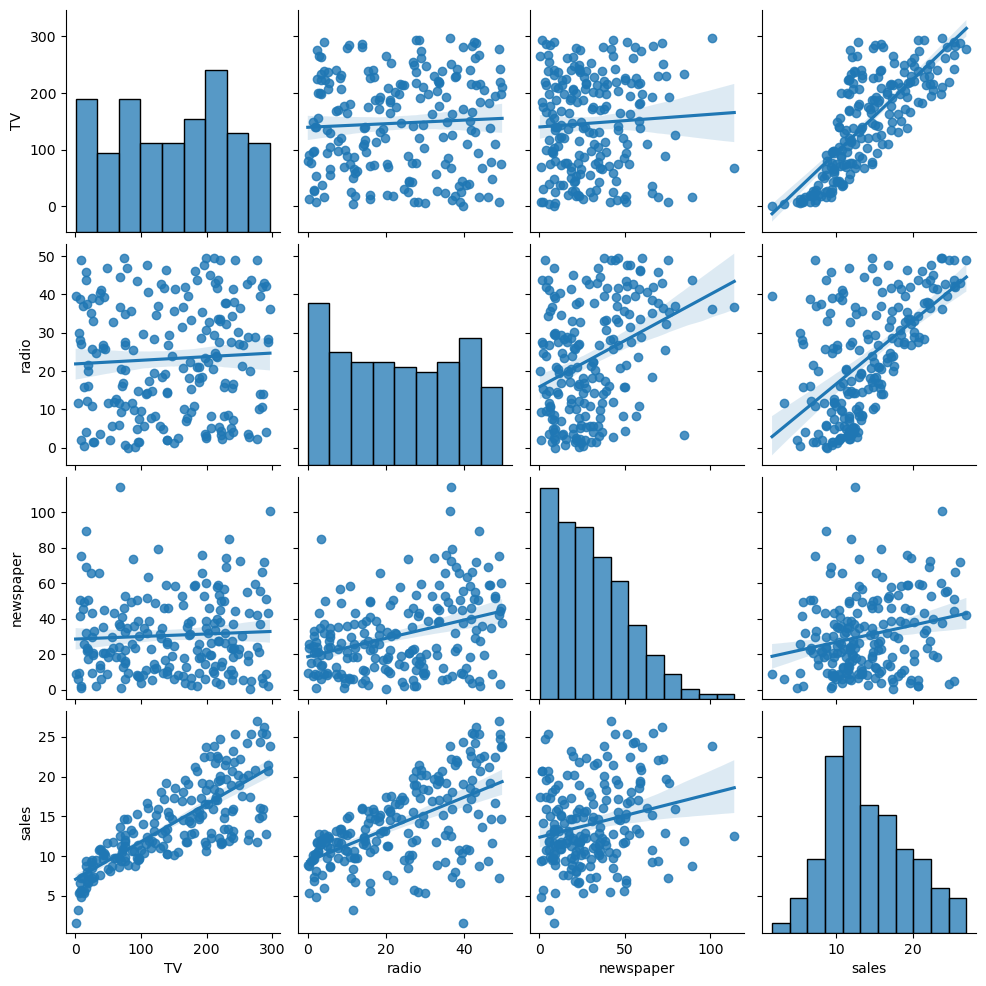

In [15]:
### A review of dependencies as scatter charts of the seaborn library

sns.pairplot(df, kind = 'reg')

<Axes: >

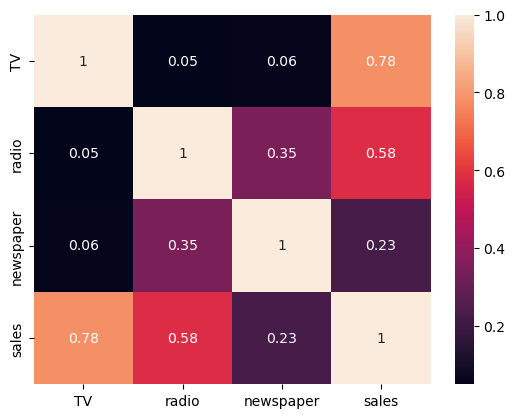

In [16]:
### Consider dependencies using correlation coefficients

correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

## Fitting the models

In [18]:
### Independent variables

X = df[['TV', 'radio', 'newspaper']]

### Dependent, predicted variable

y = df['sales']

In [19]:
### Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Linear regression model

The coefficient of determination (R2) for train data is 0.890
The coefficient of determination (R2) for test data is 0.916


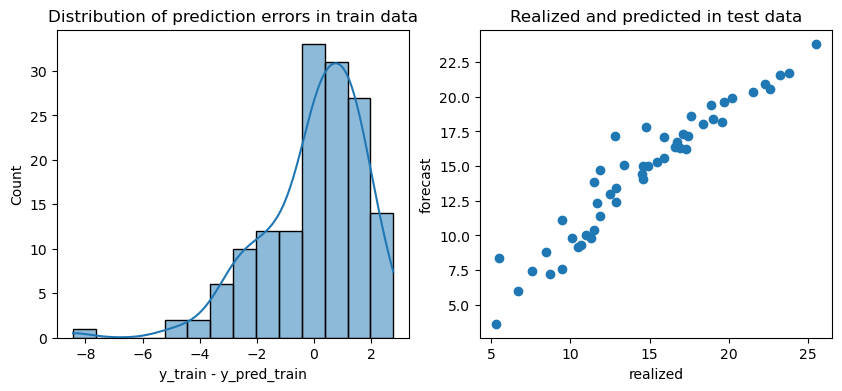

In [21]:
### Here the previously defined modeling function is utilized.

model = LinearRegression()
lr = modeling(model)

### Random Forest

The coefficient of determination (R2) for train data is 0.996
The coefficient of determination (R2) for test data is 0.983


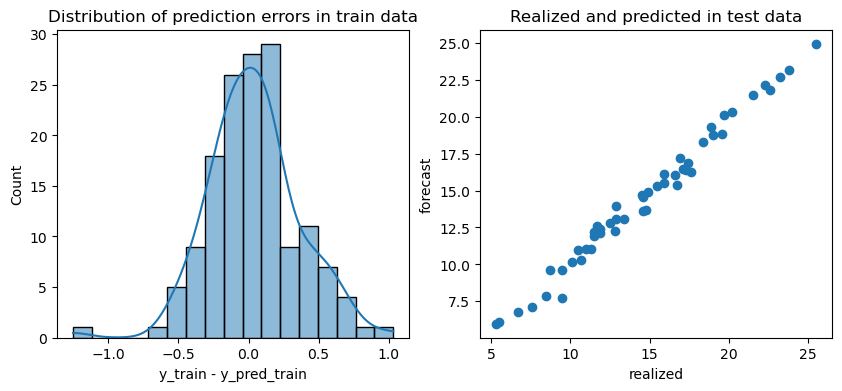

In [23]:
### Here the previously defined modeling function is utilized.

model = RandomForestRegressor()
rfr = modeling(model)

### Gradient Boosting

The coefficient of determination (R2) for train data is 0.999
The coefficient of determination (R2) for test data is 0.983


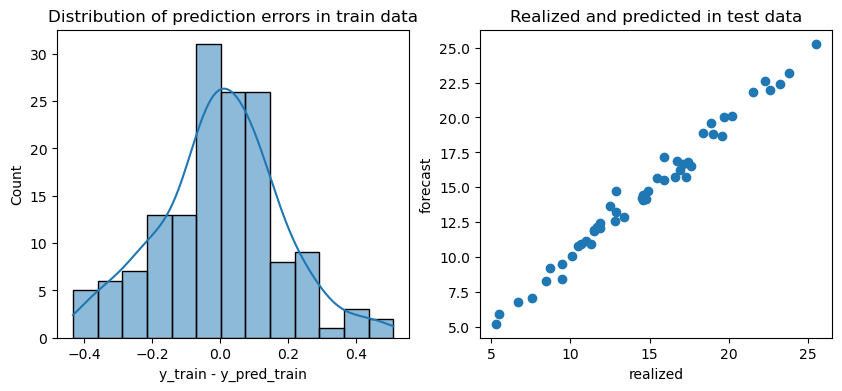

In [25]:
### Here the previously defined modeling function is utilized.

model = GradientBoostingRegressor()
gbr = modeling(model)

Finally, a summary of the accuracy of the models tested above:

In [27]:
method = ["LinearRegression", "RandomForestRegressor", "GradientBoostingRegressor"]
pd.DataFrame({'Model': method, 'The coefficient of determination (train data)':R2_train, 'The coefficient of determination (test data)':R2_test})

,Model,The coefficient of determination (train data),The coefficient of determination (test data)
0,LinearRegression,0.890,0.916
1,RandomForestRegressor,0.996,0.983
2,GradientBoostingRegressor,0.999,0.983


# Calculate predictions

The Finance Department wants the analysts to give different alternatives for the marketing budget total 240 divided into different medias.

Next, we calculate these choices using the Random Forest and Gradient Boosting models.

In [30]:
# Dataframe corresponding the alternative budgets

df_240 = pd.DataFrame([[80, 80, 80], [240, 0, 0], [0, 240, 0], [0, 0, 240], [120, 120, 0]],
                     columns=['TV', 'radio', 'newspaper'])

df_240

,TV,radio,newspaper
0,80,80,80
1,240,0,0
2,0,240,0
3,0,0,240
4,120,120,0


In [31]:
# Print results

print('Random Forest Regression sales predictions: ', rfr.predict(df_240))
print('Gradient Boosting Regression sales predictions: ', gbr.predict(df_240))

Random Forest Regression sales predictions:  [14.337 11.657  3.3    4.085 15.8  ]
Gradient Boosting Regression sales predictions:  [14.77845671 11.83324902  2.2332409   2.43438857 17.02332552]


Source and origin of inspiration:<br />
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>.

In [33]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2025-03-29 22:42 by Juha Nurmonen
